✅ Dataset loaded successfully!
Shape: (195, 24)

First 5 rows:


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-nul

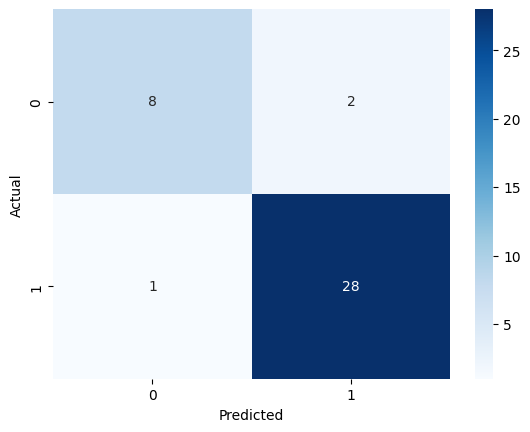


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

🎯 Model Accuracy: 92.31%


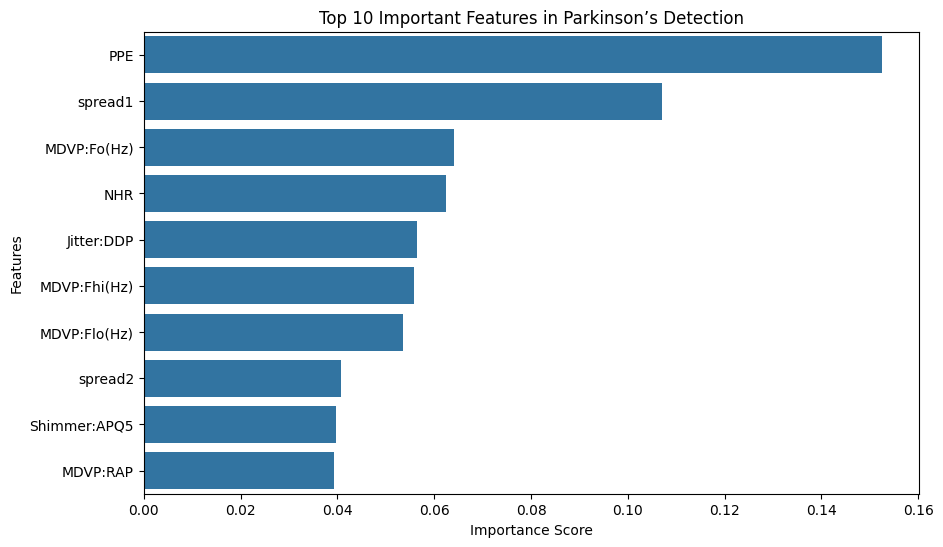


🧠 Sample Prediction:
Predicted: Parkinson’s Detected


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
# Parkinson’s Disease Detection - Final Google Colab Notebook
# Author: Sarabjit Kaur

# ===============================
# STEP 1: Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from zipfile import ZipFile

# ===============================
# STEP 2: Extract and Load Dataset
# ===============================
# Upload 'parkinsons.zip' using the file upload button in Colab before running this cell

with ZipFile("parkinsons.zip", "r") as zip_ref:
    zip_ref.extractall("parkinsons_data")

# Load the first dataset
df = pd.read_csv("parkinsons_data/parkinsons.data")

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# ===============================
# STEP 3: Basic Info & Data Cleaning
# ===============================
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum().sum())

# ===============================
# STEP 4: Feature Selection
# ===============================
# Remove name column (not needed)
df = df.drop(columns=["name"], axis=1)

# Separate features and target
X = df.drop(columns=["status"], axis=1)
y = df["status"]

# ===============================
# STEP 5: Split the Dataset
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Data split completed.")

# ===============================
# STEP 6: Standardize Features
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Data scaled successfully.")

# ===============================
# STEP 7: Model Training
# ===============================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
print("✅ Model training completed.")

# ===============================
# STEP 8: Model Evaluation
# ===============================
y_pred = model.predict(X_test_scaled)

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {acc*100:.2f}%")

# ===============================
# STEP 9: Feature Importance
# ===============================
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Important Features in Parkinson’s Detection")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ===============================
# STEP 10: Final Prediction Example
# ===============================
sample = X_test.iloc[0].values.reshape(1, -1)
pred = model.predict(scaler.transform(sample))
print("\n🧠 Sample Prediction:")
print("Predicted:", "Parkinson’s Detected" if pred[0]==1 else "Healthy")
